In [4]:
!pip3 install psycopg2-binary

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 5.9 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [5]:
import psycopg2

conn = psycopg2.connect(
    host="priobike-sentry.inf.tu-dresden.de",
    port=443,
    database="observations",
    user="postgres",
    password="Et7RvZ4TjEBHRF")

cur = conn.cursor()
cur.execute('SELECT COUNT(*) FROM observation_dbs;')
rows_observation_dbs = cur.fetchone()
print("Rows in 'observation_dbs' table")
print(rows_observation_dbs)

cur.close()
conn.close()

Rows in 'observation_dbs' table
(3350124833,)


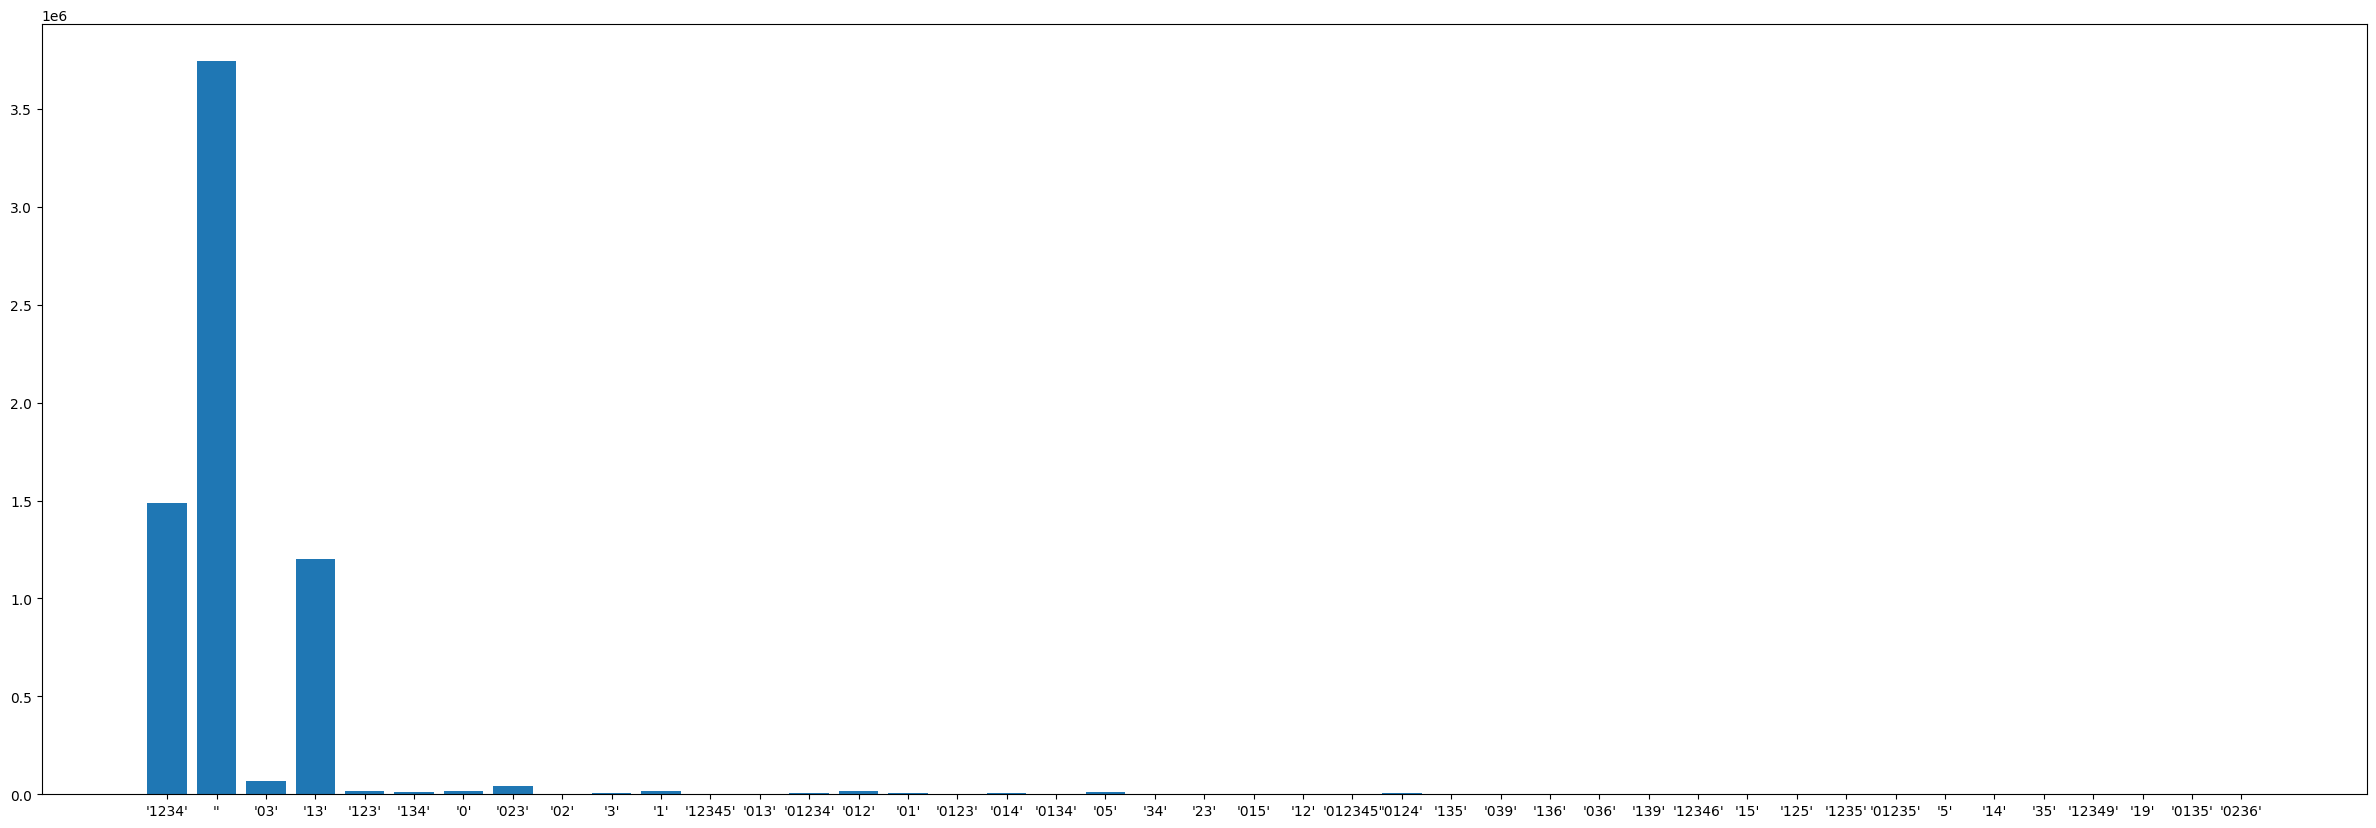

In [6]:
import json
import matplotlib.pyplot as plt

with open('processed_things.json') as f:
    processed_things = json.load(f)
    
results_distribution = {}
    
for thing_name, thing in processed_things.items():
    for day_idx in range(7):
        for hour_idx in range(24):
            results = thing['Results'][day_idx][hour_idx]
            sorted_results = sorted(results)
            results_string = ''.join(str(e) for e in sorted_results)
            string = "'" + results_string + "'"
            if string not in results_distribution:
                results_distribution[string] = 1
            else:
                results_distribution[string] += 1

fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(range(len(results_distribution)), list(results_distribution.values()), align='center')
ax.set_xticks(range(len(results_distribution)))
ax.set_xticklabels(list(results_distribution.keys()))
plt.show()
                